In [1]:
# データセット用意

In [2]:
import numpy as np
import pandas as pd
import math
import random
%matplotlib inline

In [3]:
def _load_data(data, seq_len=100):
    x, y = [], []
    for i in range(0, len(data)-seq_len):
        x.append(data.iloc[i:i+seq_len].values)
        y.append(data.iloc[i+seq_len].values)
        
    return np.array(x), np.array(y)

In [4]:
random.seed(0)
# sin波に加えるノイズの係数
random_factor = 0.05
# サイクルあたりの長さ，サイクル数
step_per_cycle = 80
cycle = 50

e:\python\python36\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['RictyDiminished-Regular'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


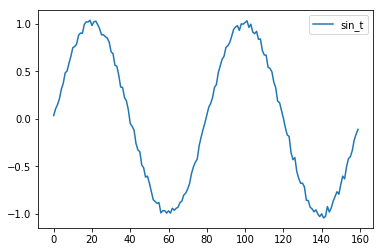

In [5]:
df = pd.DataFrame(np.arange(step_per_cycle * cycle + 1), columns=["t"])
sin_x = lambda x: math.sin(x * (2 * math.pi / step_per_cycle)) + random.uniform(-1.0, 1.0) * random_factor
df["sin_t"] = df.t.apply(sin_x)
df[["sin_t"]].head(step_per_cycle * 2).plot()

In [6]:
length_of_sequence = 100
# 全データに対するテストデータの割合
train_data_ratio = 0.9
train_size = int(round(len(df) * train_data_ratio))

X_train, y_train = _load_data(df[["sin_t"]].iloc[0:train_size], length_of_sequence)
X_test, y_test = _load_data(df[["sin_t"]].iloc[train_size:], length_of_sequence)

In [7]:
# ネットワーク構成

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [9]:
in_out_neurons = 1
hidden_neurons = 300

model = Sequential()
model.add(LSTM(hidden_neurons,
               batch_input_shape=(None, length_of_sequence, in_out_neurons),
               return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")

In [10]:
model.fit(X_train, y_train, batch_size=600, nb_epoch=15, validation_split=0.05)

e:\python\python36\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3325 samples, validate on 176 samples
Epoch 1/15
1800/3325 [===============>..............] - ETA: 6s - loss: 0.2523

KeyboardInterrupt: 

In [ ]:
predicted = model.predict(X_test)

In [ ]:
dataf = pd.DataFrame(predicted[:200])
dataf.columns = ["predict"]
dataf["input"] = y_test[:200]
dataf.plot(figsize=(15, 5))

In [14]:
len(y_train)

3501